In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

## 지하철 노선별 역별 이용현황

In [43]:
monthly = pd.read_excel('../datas/monthlytotal_202106Tmoney.xls', sheet_name='지하철 노선별 역별 이용현황', thousands=',')
monthly.head(20)

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2021-06,1호선,1,서울역,1148863,1087656,2021-07-03 11:17:41
1,2021-06,1호선,10,동묘앞,262765,272051,2021-07-03 11:17:41
2,2021-06,1호선,2,시청,533779,545742,2021-07-03 11:17:41
3,2021-06,1호선,3,종각,882915,858152,2021-07-03 11:17:41
4,2021-06,1호선,4,종로3가,684833,625095,2021-07-03 11:17:41
5,2021-06,1호선,5,종로5가,598069,597269,2021-07-03 11:17:41
6,2021-06,1호선,6,동대문,320458,309061,2021-07-03 11:17:41
7,2021-06,1호선,7,신설동,369215,360136,2021-07-03 11:17:41
8,2021-06,1호선,8,제기동,459463,470591,2021-07-03 11:17:41
9,2021-06,1호선,9,청량리(서울시립대입구),553525,555155,2021-07-03 11:17:41


In [44]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     608 non-null    object
 1   호선명     608 non-null    object
 2   역ID     608 non-null    int64 
 3   지하철역    608 non-null    object
 4   승차승객수   608 non-null    int64 
 5   하차승객수   608 non-null    int64 
 6   작업일시    608 non-null    object
dtypes: int64(3), object(4)
memory usage: 33.4+ KB


In [45]:
monthly[['승차승객수', '하차승객수']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   승차승객수   608 non-null    int64
 1   하차승객수   608 non-null    int64
dtypes: int64(2)
memory usage: 9.6 KB


In [46]:
monthly_total = monthly.groupby(by='호선명', axis=0).sum()
del monthly_total['역ID']
monthly_total = monthly_total.reset_index()
monthly_total

,호선명,승차승객수,하차승객수
0,1호선,5813885,5680908
1,2호선,35259192,35666021
2,3호선,13316015,13278726
3,4호선,12522917,12613761
4,5호선,16516300,16452518
5,6호선,8547666,8397992
6,7호선,18081845,17843275
7,8호선,4812474,4847137
8,9호선,7134220,7236116
9,9호선2~3단계,2426862,2412508


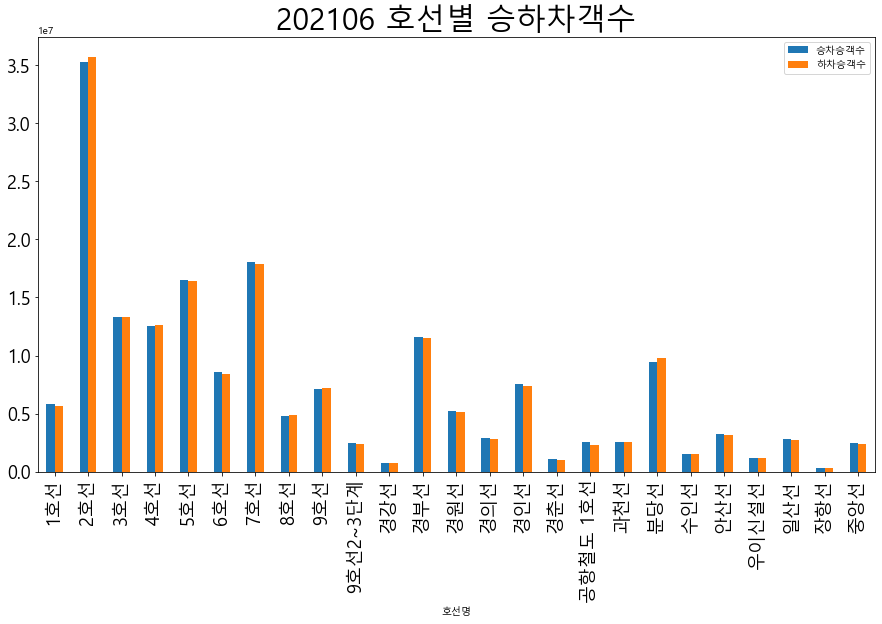

In [47]:
# 6월의 호선별 총 승하차승객수
# https://www.delftstack.com/ko/howto/matplotlib/pandas-plot-multiple-columns-on-bar-chart-matplotlib/


monthly_total.plot(x='호선명', y=['승차승객수', '하차승객수'], kind='bar', figsize=(15,8), fontsize=18)
plt.title('202106 호선별 승하차객수', fontsize=30)
plt.show()

In [56]:
hour = pd.read_excel('../datas/monthlytotal_202106Tmoney.xls', sheet_name='지하철 시간대별 이용현황', thousands=',', header=1)

# hour.iloc[0, :] 
hour.columns = ['사용월', '호선명', '역ID', '지하철역', '04시승차', '04시하차', '05시승차', '05시하차', '06시승차', '06시하차', '07시승차', '07시하차', '08시승차', '08시하차', '09시승차', '09시하차', '10시승차', '10시하차', '11시승차', '11시하차', '12시승차', '12시하차', '13시승차', '13시하차', '14시승차', '14시하차', '15시승차', '15시하차', '16시승차', '16시하차', '17시승차', '17시하차', '18시승차', '18시하차', '19시승차', '19시하차', '20시승차', '20시하차', '21시승차', '21시하차', '22시승차', '22시하차', '23시승차', '23시하차', '24시승차', '24시하차', '01시승차', '01시하차', '02시승차', '02시하차', '03시승차', '03시하차', '작업일시']
del hour['작업일시']
hour.head()


,사용월,호선명,역ID,지하철역,04시승차,04시하차,05시승차,05시하차,06시승차,06시하차,...,23시승차,23시하차,24시승차,24시하차,01시승차,01시하차,02시승차,02시하차,03시승차,03시하차
0,2021-06,1호선,1,서울역,654,17,9008,6400,12474,37203,...,11581,8024,30,637,0,1,0,0,0,0
1,2021-06,1호선,10,동묘앞,51,1,3218,1100,3422,4802,...,1035,2589,4,1348,0,0,0,0,0,0
2,2021-06,1호선,2,시청,37,0,1881,4340,2948,21443,...,4390,1485,3,92,0,0,0,0,0,0
3,2021-06,1호선,3,종각,127,1,2314,4354,2868,23755,...,8153,1675,21,135,0,0,0,0,0,0
4,2021-06,1호선,4,종로3가,191,24,3227,3388,3069,13080,...,6768,2318,25,413,0,0,0,0,0,0


In [57]:
hour_two = hour[hour['호선명']=='2호선']
hour_two

,사용월,호선명,역ID,지하철역,04시승차,04시하차,05시승차,05시하차,06시승차,06시하차,...,23시승차,23시하차,24시승차,24시하차,01시승차,01시하차,02시승차,02시하차,03시승차,03시하차
10,2021-06,2호선,11,시청,14,1,842,1763,1860,14975,...,3207,1524,1,59,0,1,0,0,0,0
11,2021-06,2호선,12,을지로입구,64,3,1704,2012,2899,28884,...,6249,3586,4,1586,0,0,0,0,0,0
12,2021-06,2호선,13,을지로3가,9,1,911,1683,1978,18284,...,5310,1908,2,179,0,0,0,0,0,0
13,2021-06,2호선,14,을지로4가,5,0,945,1253,1506,13007,...,2086,1294,2,108,1,0,0,0,0,0
14,2021-06,2호선,15,동대문역사문화공원(DDP),334,5,6338,1096,4462,7728,...,4046,5848,3,362,0,0,0,0,0,0
15,2021-06,2호선,16,신당,24,9,6188,1100,11533,8661,...,2756,7887,1,77,0,0,0,0,0,0
16,2021-06,2호선,17,상왕십리,84,8,5331,539,13243,5660,...,1724,9274,0,0,0,0,0,0,0,0
17,2021-06,2호선,18,왕십리(성동구청),874,2,6955,837,9989,5418,...,4941,8312,11,78,0,0,0,0,0,0
18,2021-06,2호선,19,한양대,10,3,976,230,2194,5599,...,3269,2364,1,4,1,0,0,0,0,0
19,2021-06,2호선,20,뚝섬,25,11,3481,2219,7841,14766,...,4086,5431,4,60,0,0,0,0,0,0


In [58]:
hour_two_on = hour_two[['지하철역','04시승차', '05시승차', '06시승차', '07시승차', '08시승차', '09시승차', '10시승차', '11시승차', '12시승차', '13시승차', '14시승차', '15시승차', '16시승차', '17시승차', '18시승차', '19시승차', '20시승차', '21시승차', '22시승차', '23시승차', '24시승차', '01시승차', '02시승차', '03시승차']]

hour_two_on
hour_two_on['지하철역']

10                시청
11             을지로입구
12             을지로3가
13             을지로4가
14    동대문역사문화공원(DDP)
15                신당
16              상왕십리
17         왕십리(성동구청)
18               한양대
19                뚝섬
20                성수
21              건대입구
22          구의(광진구청)
23        강변(동서울터미널)
24              잠실나루
25          잠실(송파구청)
26              잠실새내
27             종합운동장
28          삼성(무역센터)
29                선릉
30                역삼
31                강남
32        교대(법원.검찰청)
33                서초
34                방배
35                사당
36          낙성대(강감찬)
37       서울대입구(관악구청)
38                봉천
39                신림
40               신대방
41           구로디지털단지
42          대림(구로구청)
43               신도림
44                문래
45             영등포구청
46                당산
47                합정
48              홍대입구
49                신촌
50                이대
51                아현
52        충정로(경기대입구)
53                용답
54                신답
55               신설동
56               도림천
57           

In [59]:
hour_two_on
hour_two_on.columns = hour_two_on.iloc[0]
hour_two_on = hour_two_on.drop([10])
hour_two_on

10,시청,14,842,1860,4613,6633,8802,11360,16922,17020,...,161483,49943,34005,34984,25529,3207,1,0,0,0
11,을지로입구,64,1704,2899,7675,13246,13992,16743,25033,30391,...,239134,92855,80662,56892,45993,6249,4,0,0,0
12,을지로3가,9,911,1978,5137,8881,9900,11150,15465,17546,...,128972,49903,34156,45363,45271,5310,2,0,0,0
13,을지로4가,5,945,1506,3094,5920,6472,8712,11935,14213,...,69279,29431,15595,13658,11588,2086,2,1,0,0
14,동대문역사문화공원(DDP),334,6338,4462,6190,9136,9118,10107,13110,15181,...,40202,23199,17109,19484,14614,4046,3,0,0,0
15,신당,24,6188,11533,26362,41840,24992,17394,16546,18555,...,32669,20439,14612,13856,12814,2756,1,0,0,0
16,상왕십리,84,5331,13243,38398,59728,32021,19804,17833,18591,...,28805,17223,11409,10593,8229,1724,0,0,0,0
17,왕십리(성동구청),874,6955,9989,25284,43964,26985,17938,18453,20015,...,35785,21457,19821,26754,28512,4941,11,0,0,0
18,한양대,10,976,2194,4958,8237,6480,6244,8340,9617,...,27398,13176,10124,10249,9117,3269,1,1,0,0
19,뚝섬,25,3481,7841,18702,25566,17966,14073,15173,18985,...,125164,61137,38540,38004,29495,4086,4,0,0,0
20,성수,67,5404,9234,22648,29800,22575,19827,20914,24384,...,227994,95913,55590,61467,46179,5474,5,0,0,0


In [60]:
hour_two_on_change = hour_two_on.transpose()
hour_two_on_change.columns = hour_two_on_change.iloc[0]
hour_two_on_change = hour_two_on_change.drop(['지하철역'])
hour_two_on_change

KeyError: "['지하철역'] not found in axis"

In [ ]:
# 역이 전부 나오지 않음????
# xy축을 바꿔서 출력하고 싶다.....

hour_two_on.plot(x='지하철역', kind='line', figsize=(20, 10), fontsize=18)
# plt.colorbar(label='color')
plt.title('202106 2호선 시간별 승하차객수', fontsize=30)
plt.show()

In [ ]:
hour_two_on_change.plot(kind='line', figsize=(20,10), fontsize=18)
# plt.colorbar(label='color')
plt.title('202106 2호선 시간별 승하차객수', fontsize=30)
plt.show()

In [ ]:
hour_two_on_change.plot(y=['신림', '선릉', '을지로입구', '강남', '역삼', '성수', '봉천', '홍대입구'], kind='line', figsize=(15,10), fontsize=18)
# plt.colorbar(label='color')
plt.title('202106 2호선 시간별 승하차객수', fontsize=30)
plt.show()

# 신림, 선릉, 을지로입구, 강남, 역삼, 성수, 봉천, 홍대입구

In [5]:
pay = pd.read_excel('./datas/monthlytotal_202106Tmoney.xls', sheet_name='지하철 유무임별 이용현황', thousands=',')
pay

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2021-06,1호선,1,서울역,981045,929270,167818,158386,2021-07-03 11:17:45
1,2021-06,1호선,10,동묘앞,122567,130984,140198,141067,2021-07-03 11:17:45
2,2021-06,1호선,2,시청,471693,484053,62086,61689,2021-07-03 11:17:45
3,2021-06,1호선,3,종각,771110,752458,111805,105694,2021-07-03 11:17:45
4,2021-06,1호선,4,종로3가,427162,383856,257671,241239,2021-07-03 11:17:45
...,...,...,...,...,...,...,...,...,...
603,2021-06,우이신설선,710,북한산보국문,123564,115379,37368,37811,2021-07-03 11:17:45
604,2021-06,우이신설선,711,정릉,83296,75129,39625,37173,2021-07-03 11:17:45
605,2021-06,우이신설선,712,성신여대입구(돈암),60791,71260,25633,24546,2021-07-03 11:17:45
606,2021-06,우이신설선,713,보문,27516,27210,12863,13179,2021-07-03 11:17:45


In [6]:
pay_one = pay[pay['호선명']=='1호선']
nopay_one = pay_one[['지하철역', '무임승차']]
nopay_one

,지하철역,무임승차
0,서울역,167818
1,동묘앞,140198
2,시청,62086
3,종각,111805
4,종로3가,257671
5,종로5가,239486
6,동대문,110748
7,신설동,103350
8,제기동,234585
9,청량리(서울시립대입구),236089


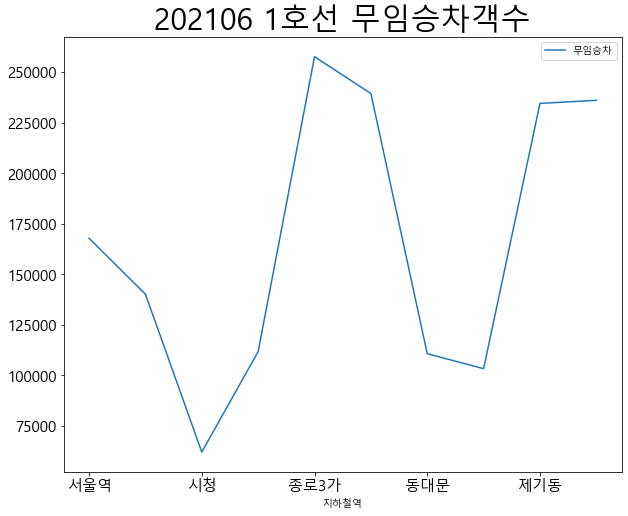

In [8]:
# 역이 전부 나오지 않음????


nopay_one.plot(x='지하철역', kind='line', figsize=(10,8), fontsize=15)
plt.title('202106 1호선 무임승차객수', fontsize=30)
plt.show()

In [237]:
daily = pd.read_csv('./datas/202106daily.csv')

daily.dropna(axis=1, inplace=True)
daily.columns = ['노선명', '역명', '승차총승객수', '하차총승객수', '사용일자']
del daily['사용일자']
daily

,노선명,역명,승차총승객수,하차총승객수
20210601,3호선,신사,28955,30583
20210601,3호선,잠원,4780,4656
20210601,3호선,고속터미널,33986,32532
20210601,3호선,교대(법원.검찰청),14136,9362
20210601,3호선,남부터미널(예술의전당),27604,28821
...,...,...,...,...
20210630,1호선,서울역,42545,39641
20210630,8호선,신흥,4343,4713
20210630,분당선,망포,14451,13503
20210630,분당선,매탄권선,5121,4907


In [244]:
daily_two = daily[daily['노선명']=='2호선']
daily_two_gangnam = daily_two[daily_two['역명'] == '강남']
daily_two_gangnam

,노선명,역명,승차총승객수,하차총승객수
20210601,2호선,강남,79921,78691
20210602,2호선,강남,80014,78603
20210603,2호선,강남,80656,77871
20210604,2호선,강남,87514,86634
20210605,2호선,강남,56876,56592
20210606,2호선,강남,31080,29926
20210607,2호선,강남,78777,77461
20210608,2호선,강남,80837,78776
20210609,2호선,강남,80926,79202
20210610,2호선,강남,81554,78822


승차총승객수   하차총승객수       사용일자
노선명 역명                              
1호선 동대문   320458   309061  606318765
    동묘앞   262765   272051  606318765
    서울역  1148863  1087656  606318765
    시청    533779   545742  606318765
    신설동   369215   360136  606318765
...          ...      ...        ...
중앙선 원덕     11473    11010  606318765
    중랑    154409   147095  606318765
    지평      1982     2229  606318765
    팔당     30925    31638  606318765
    회기    656376   633886  606318765

[608 rows x 3 columns]

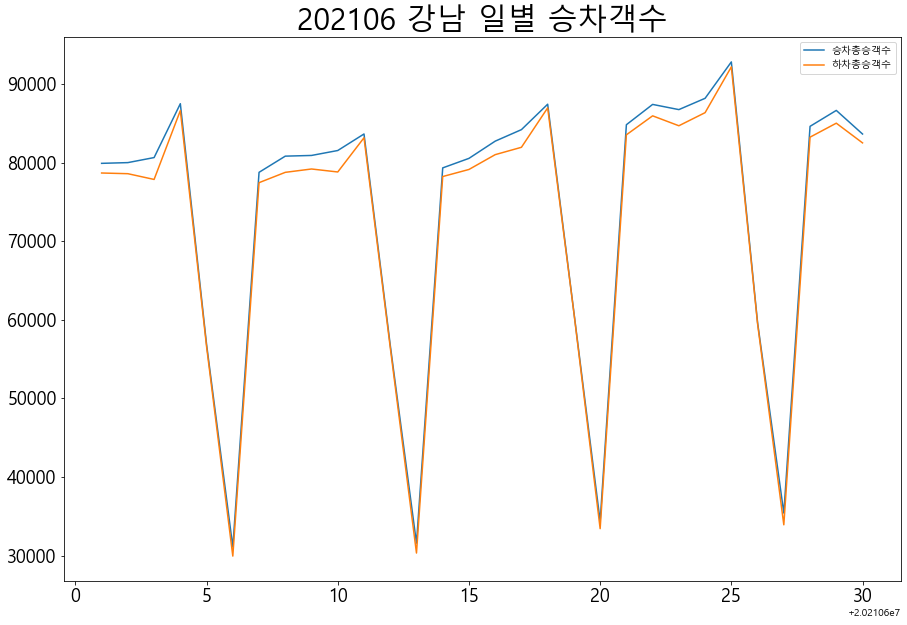

In [249]:
daily_two_gangnam.plot(kind='line', figsize=(15,10), fontsize=18)
plt.title('202106 강남 일별 승차객수', fontsize=30)
plt.show()